# **SVM - Kernel comparison**

## Kernel interpretation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
from PIL import Image
from sklearn import svm
from sklearn.datasets import make_gaussian_quantiles

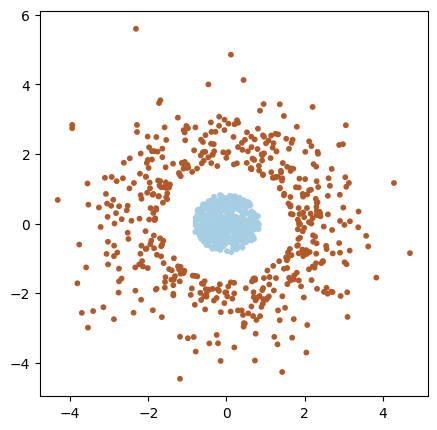

In [31]:
X, Y = make_gaussian_quantiles(cov=2,
                               n_samples=1000, n_features=2,
                               n_classes=2, random_state=1)

X[Y==0] = X[Y==0] * 0.5

_, ax = plt.subplots (figsize = (5,5))
ax.scatter( X[:, 0] , X[:, 1] , c=Y , s=10, cmap=plt.cm.Paired)

In [32]:
# Xk = X[:, 0]**2 + X[:, 1]**2
Xk = X[:, 0]*2 + X[:, 1]*2 + 1
# print (Xk.shape)
X = np.concatenate([X, Xk.reshape(-1, 1)], axis=1)
print (X.shape)

(1000, 3)


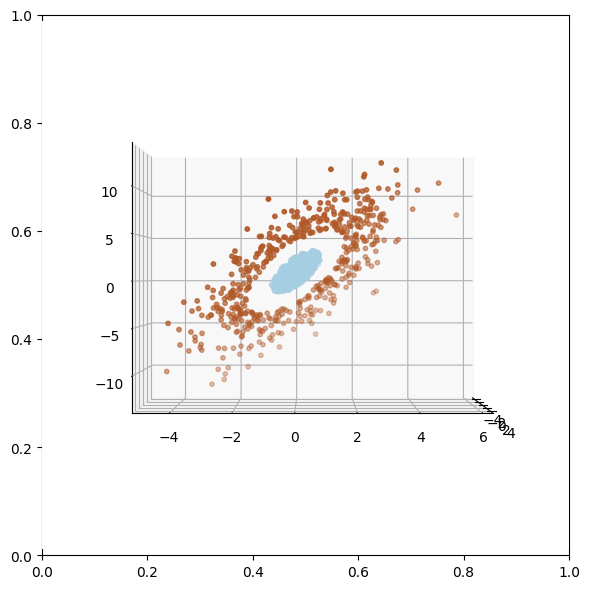

In [33]:
f, _ = plt.subplots (figsize=(6,6))
ax = f.add_subplot(projection='3d')
ax.view_init(00, 0)
ax.scatter3D( X[:, 0] , X[:, 1] , X[:, 2] , c = Y , s=10, cmap="Paired")
plt.tight_layout()

In [34]:
import os
os.makedirs("imgs/", exist_ok=True)

# Sve all figs
for i in range (0, 91, 3):
  f, _ = plt.subplots(figsize = (6,6))
  ax = f.add_subplot(projection='3d')
  ax.view_init(i, 0)
  ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=Y, s=10, cmap="Paired")
  ax.set_xticks(()), ax.set_yticks(())
  plt.tight_layout()
  plt.savefig("imgs/img_{0}".format(i), dpi=100)
  plt.close()

In [35]:
import os
from PIL import Image
from natsort import natsorted, ns

list_files = natsorted(os.listdir("imgs/"), alg=ns.PATH)
print (list_files, '\n', len(list_files))
all_images = []

# Save a gif
for file_ in list_files:
  img = Image.open("imgs/" + file_)
  all_images.append(img)

img.save("kernel_ill.gif", save_all=True, append_images=all_images, duration=200, loop=0)

['img_0.png', 'img_3.png', 'img_6.png', 'img_9.png', 'img_12.png', 'img_15.png', 'img_18.png', 'img_21.png', 'img_24.png', 'img_27.png', 'img_30.png', 'img_33.png', 'img_36.png', 'img_39.png', 'img_42.png', 'img_45.png', 'img_48.png', 'img_51.png', 'img_54.png', 'img_57.png', 'img_60.png', 'img_63.png', 'img_66.png', 'img_69.png', 'img_72.png', 'img_75.png', 'img_78.png', 'img_81.png', 'img_84.png', 'img_87.png', 'img_90.png'] 
 31


## SVM

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

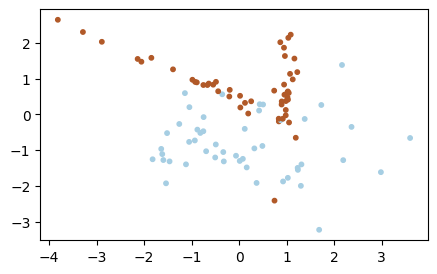

In [43]:
# we create 100 separable points
X, Y = make_classification(n_samples = 100 , n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2, random_state=2)

_, ax = plt.subplots(figsize=(5,3))
ax.scatter( X[:, 0] , X[:, 1] , c = Y , s = 10, cmap="Paired")

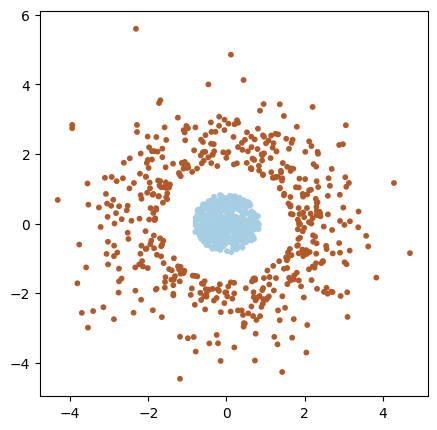

In [37]:
X, Y = make_gaussian_quantiles(cov=2,
                               n_samples=1000, n_features=2,
                               n_classes=2, random_state=1)

X[Y==0] = X[Y==0] * 0.5

_, ax = plt.subplots (figsize = (5,5))
ax.scatter( X[:, 0] , X[:, 1] , c=Y , s=10, cmap=plt.cm.Paired)

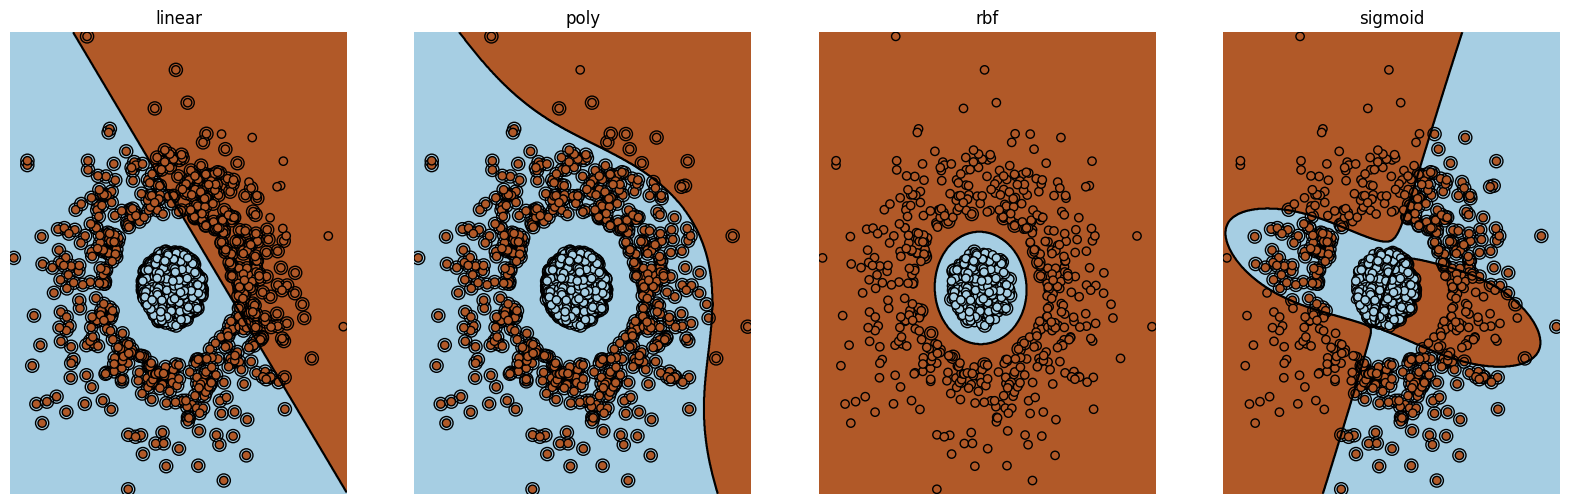

In [40]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

_, axes = plt.subplots(1,4, figsize = (20,6))

# fit the model
for i, kernel in enumerate(kernels) :
    #
    clf = svm.SVC(kernel = kernel )
    clf.fit( X , Y )

    h_min, h_max = X[:, 0].min()-0.1 , X[:, 0].max()+0.1
    v_min, v_max = X[:, 1].min()-0.1 , X[:, 1].max()+0.1

    h_grid, v_grid = np.meshgrid(np.arange( h_min , h_max , 0.01), np.arange( v_min , v_max , 0.01))
    predictions = clf.predict(np.c_[h_grid.ravel(), v_grid.ravel()])

    predictions = predictions.reshape( h_grid.shape )
    axes[i].pcolormesh( h_grid , v_grid , predictions, cmap = "Paired")
    axes[i].contour( h_grid , v_grid , predictions, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter(X[:, 0], X[:, 1], c=Y, cmap="Paired", edgecolors='k')
    axes[i].set_axis_off()
    axes[i].set_title(kernel)

plt.show()

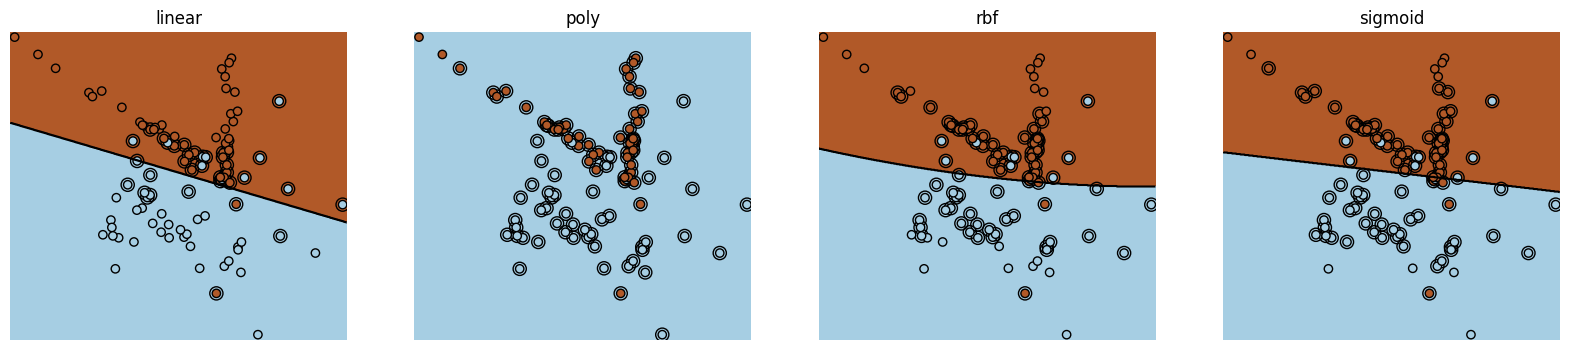

In [51]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

_, axes = plt.subplots(1,4, figsize = (20,4))

# fit the model
for i, kernel in enumerate(kernels) :
    #
    clf = svm.SVC(kernel = kernel, gamma=0.01)
    clf.fit( X , Y )

    h_min, h_max = X[:, 0].min()-0.1 , X[:, 0].max()+0.1
    v_min, v_max = X[:, 1].min()-0.1 , X[:, 1].max()+0.1

    h_grid, v_grid = np.meshgrid(np.arange( h_min , h_max , 0.01), np.arange( v_min , v_max , 0.01))
    predictions = clf.predict(np.c_[h_grid.ravel(), v_grid.ravel()])

    predictions = predictions.reshape( h_grid.shape )
    axes[i].pcolormesh( h_grid , v_grid , predictions, cmap = "Paired")
    axes[i].contour( h_grid , v_grid , predictions, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter(X[:, 0], X[:, 1], c=Y, cmap="Paired", edgecolors='k')
    axes[i].set_axis_off()
    axes[i].set_title(kernel)

plt.show()

Crear una función para graficar las fronteras de decisión de las SVM con las dos opciones mostradas anteriormente.

## In real data

Continúe evaluando los kernels anteriores en la base de datos Iris y fruits.